# STEP 1 :Exploratory analysis

Whenever we obtain a new dataset, our first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called g1800s. In the IPython Shell, use pandas methods such as .head(), .info(), and .describe(), and DataFrame attributes like .columns and .shape to explore it.

In [30]:
import pandas as pd
g1800s=pd.read_csv('gapminder.csv',index_col=0)
#g1800s.drop(['Unnamed: 0'],axis=0)
g1800s.set_index(['Life expectancy'])
print('     HEAD    \n\n')
print(g1800s.head())
print('\n\n          INFO\n\n')
print(g1800s.info())
print('\n\n          DESCRIBE\n\n')
print(g1800s.describe())
print('\n\n           COLUMNS\n\n')
print(g1800s.columns)
print('\n\n         Shape of DataFrame\n\n')
print(g1800s.shape)
print('\n\n\nCount Value\n\n')
print(g1800s['Life expectancy'].value_counts())

     HEAD    


    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN   

# STEP 2:Visualizing our data

Our job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

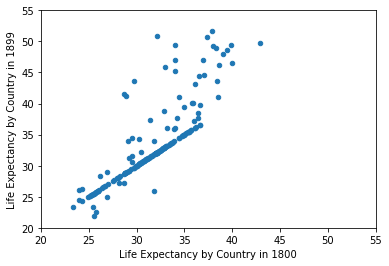

In [25]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


As We can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

# STEP 3:ASSERTING

In [27]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric =pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[-1] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid , axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] ==1


AssertionError: 

# STEP 4:Reshaping our data

Now that we have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What we want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, we can use it as a predictor variable in a later analysis. 

We can convert the DataFrame into the desired tidy format by melting it.

In [33]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=g1800s,id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns =['country','year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt)



                         country  year  life_expectancy
0                       Abkhazia  1800              NaN
1                    Afghanistan  1800            28.21
2          Akrotiri and Dhekelia  1800              NaN
3                        Albania  1800            35.40
4                        Algeria  1800            28.82
5                 American Samoa  1800              NaN
6                        Andorra  1800              NaN
7                         Angola  1800            26.98
8                       Anguilla  1800              NaN
9            Antigua and Barbuda  1800            33.54
10                     Argentina  1800            33.20
11                       Armenia  1800            34.00
12                         Aruba  1800            34.42
13                     Australia  1800            34.05
14                       Austria  1800            34.40
15                    Azerbaijan  1800            29.17
16                       Bahamas  1800          

# STEP 5:Checking the data types

Now that our data is in the proper shape, we need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

In [37]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [38]:
gapminder_melt.dtypes

country             object
year                object
life_expectancy    float64
dtype: object

Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

In [40]:
# Convert the year column to numeric
import numpy as np
gapminder_melt.year = pd.to_numeric(gapminder_melt['year'])

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64


# STEP 6:Use Regular Expression

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

    The set of lower and upper case letters.
    Whitespace between words.
    Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Python has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

In [41]:
# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all the duplicates from countries
countries =countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse =~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


# STEP 7:Missing Data

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column

In general, it is not the best idea to drop missing values, because in doing so we may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. We could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy we go with, it is important to carefully consider all options and understand how they will affect our data.



In [44]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder = gapminder_melt.dropna(axis=0,how='any')

# Print the shape of gapminder
print(gapminder.shape)


(43857, 3)


After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

# STEP 8:Visualization

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method. 

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


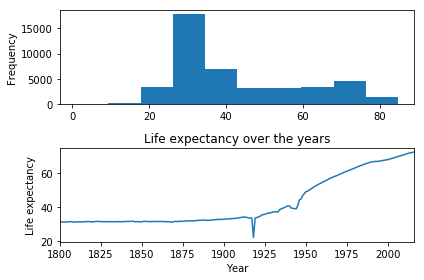

In [45]:
# Add first subplot
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder1.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
